This code allows you to estimate:
The Intersection density INDEX at the ORIGIN for only one origin point or for a set of origins. All the intersections related to each origin are assumed to be previously estimated.   

All the following Python libraries must be previously installed in your Python.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import geopandas as gpd
import csv

# Origin's intersection density INDEX 

### Example for only one origin

The data is taken from a shape already including the points within a 600m buffer associated to origin of the route.

In [3]:
route = 1002
db = gpd.read_file('../Shapes/start_intersections600/R' +"%s" % (route) +'_start_intersections600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,highway,osmid,X_coor,Y_coor,Traf_light,Intersec,ruta,Heri,ID_node,Z,geometry
0,None,559949958,836984.703564,1.189293e+06,0,1,None,0,7197.0,1548.736771,POINT (836984.7035643517 1189292.667173542)
1,None,559950399,836933.498052,1.189124e+06,0,1,None,0,7198.0,1571.318717,POINT (836933.4980521626 1189123.633791672)
2,None,559950401,836973.401414,1.189214e+06,0,1,None,0,7199.0,1559.070770,POINT (836973.4014135017 1189213.945533224)
3,None,559950412,836695.392790,1.189118e+06,0,1,None,0,7200.0,1520.203215,POINT (836695.3927895853 1189117.945953992)
4,None,559950417,836541.449195,1.189161e+06,0,1,None,0,7201.0,1488.737522,POINT (836541.4491950173 1189161.281887025)


In [4]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
highway       0 non-null object
osmid         154 non-null object
X_coor        154 non-null float64
Y_coor        154 non-null float64
Traf_light    154 non-null int64
Intersec      154 non-null int64
ruta          0 non-null object
Heri          154 non-null int64
ID_node       154 non-null float64
Z             154 non-null float64
geometry      154 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 13.3+ KB


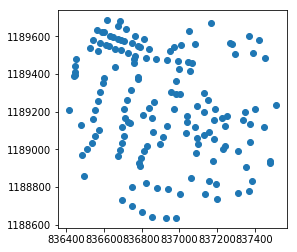

In [7]:
db.plot()

In [8]:
#number or intersections
ni = len(db)
#Buffer radio
radio = 0.6
#Buffer area 
area = 3.14159265358979 * radio**2
#Intersection index
intindex = ni / area
print (ni)
print (area)
print (intindex)

154
1.1309733552923245
136.16589575639946


In [9]:
results = pd.DataFrame ({
        "ruta": [str(route)],
        "intindex": [intindex]})
print (results)

   ruta    intindex
0  1002  136.165896


### Intersection density estimated for All origins 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [12]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

The results are kept in the folder called "OUT" which is included in the Tables folder. Each resulting file is related to each origin. If you modify the structure of these folders, please modify the code.   

In [13]:
for i in routes:
    db = gpd.read_file('../Shapes/start_intersections600/R' +"%s" % (i) +'_start_intersections600.shp')
    #number or intersections
    ni = len(db)
    #Buffer radio
    radio = 0.6
    #Buffer area 
    area = 3.14159265358979 * radio**2
    #Intersection index
    intindex = ni / area
    #Saving results in a Dataframe and exporting to csv file
    results = pd.DataFrame ({
        "route": [str(route)],
        "intindex": [intindex]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_start_intersections600.txt',index=False, header=True)

### Origins' Intersenction density Repport 

This part of the code summarizes the intersection index related to each origin in only one table. Please copy it to a text file and save. 

In [17]:
print 'Route,Intindex'
for i in routes:
    df=np.loadtxt('../Tables/R' +"%s" %(i)+'_start_intersections600.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[0]))

ruta,intindex
('1002', 136.165895756)
('1006', 146.77622529600001)
('1009', 109.640071908)
('1013', 136.165895756)
('10291', 141.471060526)
('10292', 157.386554835)
('1050', 156.50236070700001)
('1052', 150.31300180900001)
('1079', 231.65886161200001)
('1099', 222.816920329)
('1100', 142.35525465399999)
('1101', 156.50236070700001)
('1102', 194.522708223)
('1104', 182.14399042700001)
('1124', 152.965584194)
('1128', 141.471060526)
('1132', 212.20659078899999)
('1134', 280.28953866699999)
('1137', 223.70111445699999)
('11391140', 223.70111445699999)
('1147', 229.89047335500001)
('1151', 211.322396661)
('1381', 238.73241463799999)
('1392', 229.00627922699999)
('1397', 184.79657281199999)
('1398', 259.953073717)
('1399', 315.65730379899998)
('1401', 87.535218700499996)
('1404', 179.49140804300001)
('1408', 214.85917317400001)
('1409', 226.35369684200001)
('1413', 177.72301978600001)
('1415', 220.16433794400001)
('1419', 171.53366088800001)
('1421', 228.12208509800001)
('1423', 215.7433673